In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry 
from phonenumbers.phonenumberutil import region_code_for_country_code 
from IPython.display import display,FileLink
import datetime
from pandas.api.types import CategoricalDtype
import glob

In [6]:
paths = glob.glob('/kaggle/input/telecom/*')
paths

['/kaggle/input/telecom/data2.csv', '/kaggle/input/telecom/data1.csv']

# Data Wrangling

In [7]:
df = pd.concat([pd.read_csv(paths[0]),pd.read_csv(paths[1])])
df

,GridID,TimeInterval,countrycode,smsin,smsout,callin,callout,internet
0,1,1385852400000,39,0.110989,0.166214,0.109202,0.164427,13.648438
1,1,1385852400000,46,NaN,NaN,NaN,NaN,0.026137
2,1,1385853000000,39,0.165137,0.176399,0.030875,0.027300,13.330858
3,1,1385853600000,0,0.029088,0.027300,NaN,NaN,NaN
4,1,1385853600000,39,0.186451,0.136588,0.054601,NaN,11.329552
...,...,...,...,...,...,...,...,...
160107998,9999,1385850600000,39,0.103475,0.835910,0.021279,0.230476,37.546408
160107999,9999,1385851200000,32,NaN,NaN,NaN,NaN,0.085995
160108000,9999,1385851200000,39,0.553518,1.043528,0.378073,0.085995,34.480912
160108001,9999,1385851800000,0,0.085995,0.085995,NaN,NaN,NaN


In [8]:
df['date'] = pd.to_datetime(df.TimeInterval, unit='ms', utc=True).dt.date
df['day'] = pd.to_datetime(df.TimeInterval, unit='ms', utc=True).dt.day
df['hour'] = pd.to_datetime(df.TimeInterval, unit='ms', utc=True,).dt.strftime('%H').add(':00')
df['weekday'] = pd.to_datetime(df.TimeInterval, unit='ms', utc=True).dt.day_name()

# Adding new country column using countrycode column
def code2country(code):
    alpha = region_code_for_country_code(code)
    country = pycountry.countries.get(alpha_2=alpha)
    
    if country is None:
        
        try:
            pn = phonenumbers.parse('+{}**1234567'.format(str(i))) 
            country = pycountry.countries.get(alpha_2 = region_code_for_number(pn)) 
            return country.name
          
        except Exception as e:
            return code

    if ',' in country.name:
        return country.name[:country.name.find(',')]
    return country.name

df['country'] = [code2country(i) for i in df['countrycode']]

In [11]:
df.isna().sum()

GridID                  0
TimeInterval            0
countrycode             0
smsin           146175906
smsout          219930197
callin          221299761
callout         181821224
internet        159214937
date                    0
day                     0
hour                    0
weekday                 0
country                 0
dtype: int64

In [12]:
df = df.fillna(0)

In [ ]:
# Reordering columns and remove datetime and day column
df = df[['GridID','date','weekday','hour','country','countrycode','smsin','smsout','callin','callout','internet']]
df = df.reset_index(drop=True)
df.head()

In [ ]:
df.to_csv('/kaggle/working/MobilePhoneData.csv',index=False)

In [ ]:
!ls

In [ ]:
FileLink(r'MobilePhoneData.csv')

# EDA

## Activity by weekday, day and hour

In [13]:
weekly_hourly_act = df[['weekday','hour','internet']].copy()
weekly_hourly_act['sms'] = df['smsin'] + df['smsout']
weekly_hourly_act['call'] = df['callin'] + df['callout']
weekly_hourly_act = pd.pivot_table(data=weekly_hourly_act,index=['hour'],columns=['weekday'],values=['sms','call','internet'],aggfunc=['sum'])
weekly_hourly_act.head()

sum                                               \
                  call                                                
weekday         Friday         Monday       Saturday         Sunday   
hour                                                                  
00:00    255899.242489  179915.904305  303912.614519  375882.532717   
01:00    160607.461759  104969.818808  184359.699224  219538.212117   
02:00    123669.178463   87209.315978  150071.478493  154149.563480   
03:00    117569.105648   96120.457727  135826.588550  123458.267235   
04:00    163497.543591  149987.149666  147165.636596  119867.306926   

                                                                    \
                                                          internet   
weekday       Thursday        Tuesday      Wednesday        Friday   
hour                                                                 
00:00    183399.765232  181440.233101  335347.785034  2.381209e+07   
01:00    103386.255521  113742.426306  191744.946694  2.060045e+07   
02:00     83350.145183   88757.519845  143231.146580  1.855958e+07   
03:00     94121.999341   98559.067357  119356.279447  1.730144e+07   
04:00    127017.002583  140659.979634  159053.135526  1.729323e+07   

                                     ...                              \
                                     ...                               
weekday        Monday      Saturday  ...      Thursday       Tuesday   
hour                                 ...                               
00:00    2.152774e+07  2.366359e+07  ...  2.067755e+07  2.232981e+07   
01:00    1.876166e+07  2.050947e+07  ...  1.778959e+07  1.935192e+07   
02:00    1.702389e+07  1.821467e+07  ...  1.616764e+07  1.766386e+07   
03:00    1.601943e+07  1.679724e+07  ...  1.519121e+07  1.659040e+07   
04:00    1.612297e+07  1.627584e+07  ...  1.526834e+07  1.673459e+07   

                                                                    \
                                 sms                                 
weekday     Wednesday         Friday         Monday       Saturday   
hour                                                                 
00:00    2.381750e+07  745085.911832  625397.630437  865958.673988   
01:00    2.065786e+07  490290.148333  412580.348634  568661.071950   
02:00    1.851082e+07  389657.352561  338288.230681  436430.345821   
03:00    1.699308e+07  353296.291954  329818.886839  383574.076057   
04:00    1.685215e+07  397345.117042  386082.570654  386246.561638   

                                                                   
                                                                   
weekday        Sunday       Thursday        Tuesday     Wednesday  
hour                                                               
00:00    1.043820e+06  596184.326432  622914.334695  1.235972e+06  
01:00    6.857249e+05  375457.014629  398222.029659  6.825467e+05  
02:00    5.003978e+05  304477.400424  323087.658262  4.586994e+05  
03:00    4.001382e+05  291314.417105  311669.377491  3.815137e+05  
04:00    3.699143e+05  337834.805852  380567.646157  4.209768e+05  

[5 rows x 21 columns]

### Weekly Activity

In [16]:
weekly_act = pd.pivot_table(data=df,index=['weekday'],values=['smsin','smsout','callin','callout','internet'],aggfunc=['sum'])
weekly_act

sum                                            \
                 callin       callout      internet         smsin   
weekday                                                             
Friday     4.417544e+07  5.033385e+07  8.381475e+08  6.551230e+07   
Monday     4.533851e+07  5.182259e+07  8.337841e+08  6.332122e+07   
Saturday   2.920534e+07  3.433835e+07  7.427405e+08  4.690449e+07   
Sunday     2.134635e+07  2.603071e+07  7.026082e+08  3.859824e+07   
Thursday   3.987236e+07  4.542531e+07  7.712391e+08  5.848264e+07   
Tuesday    4.542252e+07  5.203250e+07  8.416301e+08  6.727970e+07   
Wednesday  4.226353e+07  4.831619e+07  8.227446e+08  6.521683e+07   

                         
                 smsout  
weekday                  
Friday     3.313127e+07  
Monday     3.353295e+07  
Saturday   2.567602e+07  
Sunday     2.381716e+07  
Thursday   3.063199e+07  
Tuesday    3.673757e+07  
Wednesday  3.635262e+07

### Daily Activity

In [17]:
daily_act = pd.pivot_table(data=df,index=['date'],values=['smsin','smsout','callin','callout','internet'],aggfunc=['sum'])
daily_act

sum                                            \
                  callin       callout      internet         smsin   
date                                                                 
2013-10-31  4.643091e+04  5.480625e+04  3.623713e+06  1.221339e+05   
2013-11-01  2.599565e+06  3.172376e+06  8.186644e+07  4.569000e+06   
2013-11-02  2.844727e+06  3.424477e+06  8.135067e+07  4.771643e+06   
2013-11-03  2.270067e+06  2.788692e+06  8.335921e+07  4.339120e+06   
2013-11-04  5.411676e+06  6.167775e+06  1.082782e+08  7.751354e+06   
...                  ...           ...           ...           ...   
2013-12-28  2.372560e+06  2.914344e+06  5.918218e+07  3.868853e+06   
2013-12-29  1.866661e+06  2.332966e+06  5.518814e+07  3.365388e+06   
2013-12-30  3.287719e+06  3.942852e+06  5.996235e+07  4.752211e+06   
2013-12-31  3.358269e+06  4.040923e+06  5.776195e+07  6.534469e+06   
2014-01-01  1.834988e+06  2.438628e+06  5.014273e+07  4.492973e+06   

                          
                  smsout  
date                      
2013-10-31  9.985450e+04  
2013-11-01  2.799612e+06  
2013-11-02  2.821254e+06  
2013-11-03  2.756562e+06  
2013-11-04  4.294282e+06  
...                  ...  
2013-12-28  2.131786e+06  
2013-12-29  2.052052e+06  
2013-12-30  2.443812e+06  
2013-12-31  4.255246e+06  
2014-01-01  3.150028e+06  

[63 rows x 5 columns]

### Hourly Activity

In [31]:
hourly_act = pd.pivot_table(data=df,index=['hour'],values=['smsin','smsout','callin','callout','internet'],aggfunc=['sum'])
hourly_act

sum                                                        
             callin       callout      internet         smsin        smsout
hour                                                                       
00:00  7.596040e+05  1.056194e+06  1.609728e+08  2.740225e+06  2.995108e+06
01:00  4.236492e+05  6.546996e+05  1.388236e+08  1.536651e+06  2.076831e+06
02:00  2.891739e+05  5.412644e+05  1.245729e+08  1.041412e+06  1.709626e+06
03:00  2.753929e+05  5.096188e+05  1.154404e+08  8.632094e+05  1.588116e+06
04:00  3.778881e+05  6.293596e+05  1.141274e+08  1.003895e+06  1.675073e+06
05:00  8.948353e+05  1.308581e+06  1.277541e+08  2.071116e+06  2.412977e+06
06:00  3.419931e+06  4.397332e+06  1.734242e+08  6.511271e+06  5.365026e+06
07:00  9.956509e+06  1.203443e+07  2.264178e+08  2.058595e+07  9.442668e+06
08:00  1.716606e+07  2.029176e+07  2.563760e+08  2.595263e+07  1.202484e+07
09:00  2.098172e+07  2.413564e+07  2.750835e+08  2.910769e+07  1.319436e+07
10:00  2.260352e+07  2.577547e+07  2.865561e+08  3.033475e+07  1.374063e+07
11:00  2.182460e+07  2.429806e+07  2.935543e+08  3.091771e+07  1.395534e+07
12:00  1.832488e+07  2.059202e+07  3.001364e+08  2.799662e+07  1.309325e+07
13:00  1.863721e+07  2.103895e+07  2.996042e+08  2.707081e+07  1.327775e+07
14:00  1.945750e+07  2.196434e+07  2.974528e+08  2.723356e+07  1.303131e+07
15:00  2.143425e+07  2.395271e+07  2.999934e+08  2.785965e+07  1.320322e+07
16:00  2.279641e+07  2.555443e+07  3.020839e+08  2.873778e+07  1.381400e+07
17:00  2.153684e+07  2.441561e+07  2.987206e+08  2.595625e+07  1.380267e+07
18:00  1.752594e+07  2.029504e+07  2.820928e+08  2.399174e+07  1.285146e+07
19:00  1.208187e+07  1.445942e+07  2.664471e+08  1.943986e+07  1.177729e+07
20:00  7.755620e+06  9.364727e+06  2.566202e+08  1.650533e+07  1.144186e+07
21:00  4.497672e+06  5.388215e+06  2.436210e+08  1.296400e+07  1.006963e+07
22:00  2.833458e+06  3.412327e+06  2.218288e+08  9.086506e+06  7.797474e+06
23:00  1.769528e+06  2.229293e+06  1.911898e+08  5.806813e+06  5.539084e+06

## Grid Activity by weekday, day and hour

### Weekly Grid Activity

In [24]:
weekly_grid_act = pd.pivot_table(data=df,index=['GridID','weekday'],values=['smsin','smsout','internet','callin','callout'],aggfunc=['sum'])
weekly_grid_act

sum                                          \
                       callin      callout      internet        smsin   
GridID weekday                                                          
1      Friday      601.287460   631.086336  13217.701886   945.585139   
       Monday      626.869336   644.323191  12723.058149   896.901481   
       Saturday    484.381253   519.532358  14458.206457   835.166043   
       Sunday      358.620565   403.663426  14613.362425   723.039976   
       Thursday    528.346062   541.045892  11547.398340   792.783322   
...                       ...          ...           ...          ...   
10000  Saturday   1140.079928  1264.751116  25377.696188  1614.134367   
       Sunday      833.908942   946.943820  25194.096167  1339.456416   
       Thursday   1441.089130  1608.406900  23271.282756  1896.109713   
       Tuesday    1657.354599  1854.047418  25443.949592  2276.206524   
       Wednesday  1571.816332  1743.160054  25545.426433  2214.420515   

                               
                       smsout  
GridID weekday                 
1      Friday      479.375481  
       Monday      446.648252  
       Saturday    461.354838  
       Sunday      453.487508  
       Thursday    403.457875  
...                       ...  
10000  Saturday    941.159293  
       Sunday      865.296954  
       Thursday    840.376717  
       Tuesday    1138.490303  
       Wednesday  1119.760445  

[70000 rows x 5 columns]

### Daily Grid Activty

In [25]:
daily_grid_act = pd.pivot_table(data=df,index=['GridID','date'],values=['smsin','smsout','internet','callin','callout'],aggfunc=['sum'])
daily_grid_act

sum                                                 
                       callin     callout     internet       smsin      smsout
GridID date                                                                   
1      2013-10-31    0.591930    0.429290    57.799009    2.084285    1.104749
       2013-11-01   40.787400   48.116479  1495.758722   78.366970   45.906674
       2013-11-02   47.868367   53.907151  1523.710238   85.885518   43.581713
       2013-11-03   35.952545   40.505059  1528.912626   77.651704   45.423091
       2013-11-04   68.093766   70.534133  1410.952767  105.336583   55.242583
...                       ...         ...          ...         ...         ...
10000  2013-12-28  109.401958  131.484012  2395.604344  173.118100   70.741075
       2013-12-29   82.505544   97.432760  2427.967494  130.723738   56.702237
       2013-12-30  143.269100  158.909739  2205.645089  180.552854   71.949825
       2013-12-31  149.871675  173.140120  2290.672137  290.464811  171.317070
       2014-01-01   93.086088  112.112102  2080.978783  218.528445  119.019060

[629932 rows x 5 columns]

### Hourly Grid Activity

In [26]:
hourly_grid_act = pd.pivot_table(data=df,index=['GridID','hour'],values=['smsin','smsout','internet','callin','callout'],aggfunc=['sum'])
hourly_grid_act

sum                                                 
                  callin     callout     internet       smsin      smsout
GridID hour                                                              
1      00:00    6.243509   10.499798  2980.666936   71.029061   61.058437
       01:00    3.009829    4.376528  2587.102535   33.265228   31.697077
       02:00    1.786109    3.605884  2277.317817   19.477642   16.116379
       03:00    1.360308    2.469758  2122.585435   13.845316   10.026358
       04:00    2.223712    5.831263  2168.289694   13.748033    9.241202
...                  ...         ...          ...         ...         ...
10000  19:00  493.870050  545.522528  8729.734689  745.128854  426.900622
       20:00  293.001135  334.159559  8370.868421  580.092107  388.626097
       21:00  162.497953  176.240824  8107.118580  432.560402  303.982439
       22:00   99.915255  110.263463  7913.085632  319.925042  275.213027
       23:00   63.747021   70.833238  6051.203944  206.531805  186.106903

[240000 rows x 5 columns]

# Data Visualization

## Observation 1: Weekday & Date & Hour

In [14]:
sns.set_style(style='darkgrid')
sns.set_palette(palette="icefire")

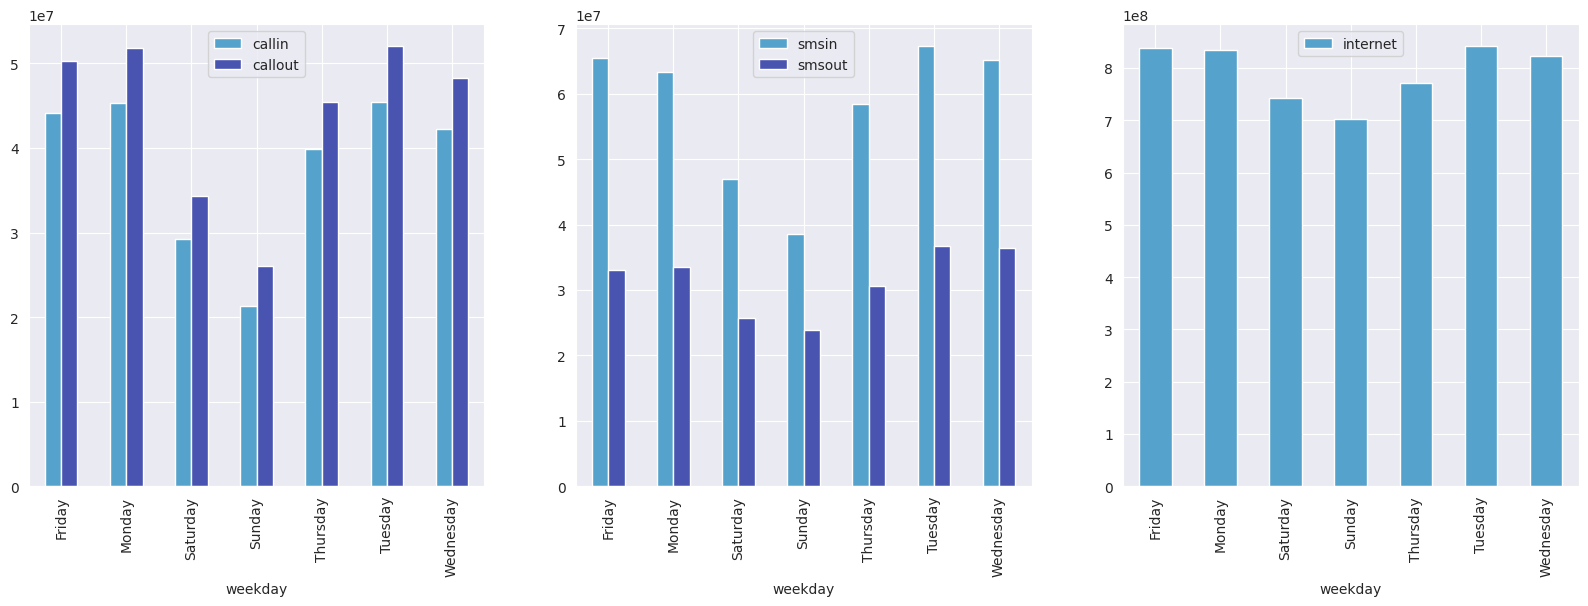

In [33]:
fig, ax = plt.subplots(1,3,figsize=(20,6))

weekly_act.plot(kind='bar',y = [('sum',   'callin'),('sum',  'callout')],ax=ax[0])
weekly_act.plot(kind='bar',y = [('sum',    'smsin'),('sum',   'smsout')],ax=ax[1])
weekly_act.plot(kind='bar',y = [('sum', 'internet')],ax=ax[2])

ax[0].legend(['callin','callout'])
ax[1].legend(['smsin','smsout'])
ax[2].legend(['internet'])

plt.show()

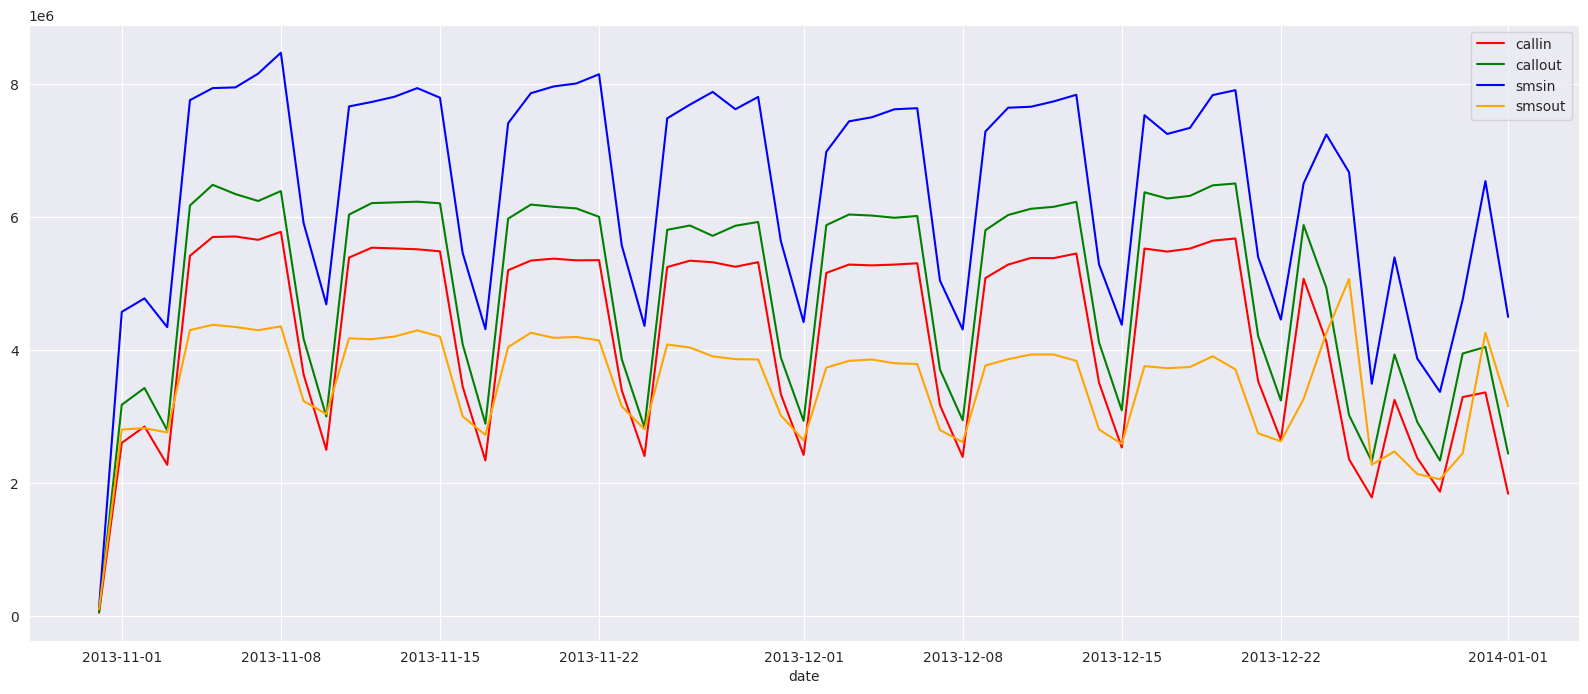

In [28]:
fig, ax = plt.subplots(figsize=(20,8))
colors = pd.Series
daily_act.plot(ax=ax, kind='line', y=[('sum',   'callin'),('sum',  'callout'),('sum',    'smsin'),('sum',   'smsout')],color=['red','green','blue','orange'])
ax.legend(['callin','callout','smsin','smsout'])
plt.show()

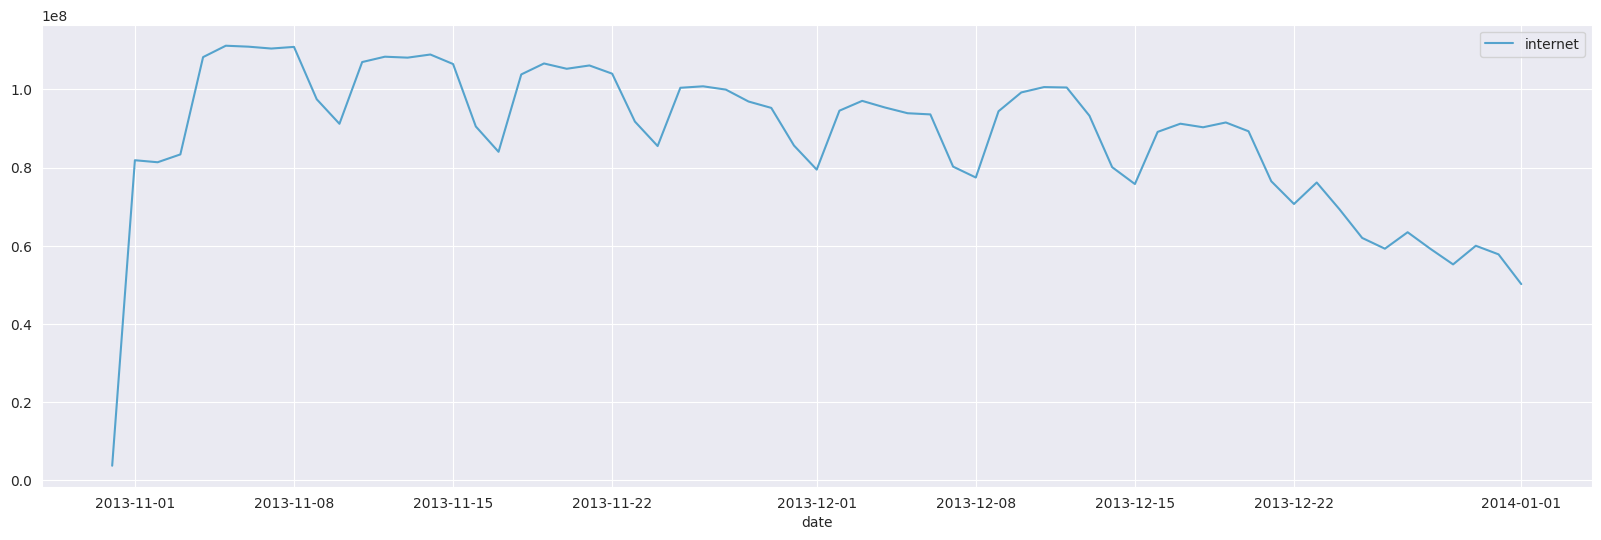

In [34]:
fig, ax = plt.subplots(figsize=(20,6))
daily_act.plot(ax=ax, kind='line', y=[('sum', 'internet')])
ax.legend(['internet'])
plt.show()

In [40]:
weekly_hourly_act.iloc[:,:2]

sum              
                       callin       callout
weekday   hour                             
Friday    00:00  1.059802e+05  1.499190e+05
          01:00  6.614106e+04  9.446640e+04
          02:00  4.309430e+04  8.057488e+04
          03:00  4.195703e+04  7.561207e+04
          04:00  6.155458e+04  1.019430e+05
...                       ...           ...
Wednesday 19:00  1.876686e+06  2.238484e+06
          20:00  1.176926e+06  1.419205e+06
          21:00  6.542166e+05  7.863926e+05
          22:00  3.965203e+05  4.780437e+05
          23:00  1.642708e+05  2.179889e+05

[168 rows x 2 columns]

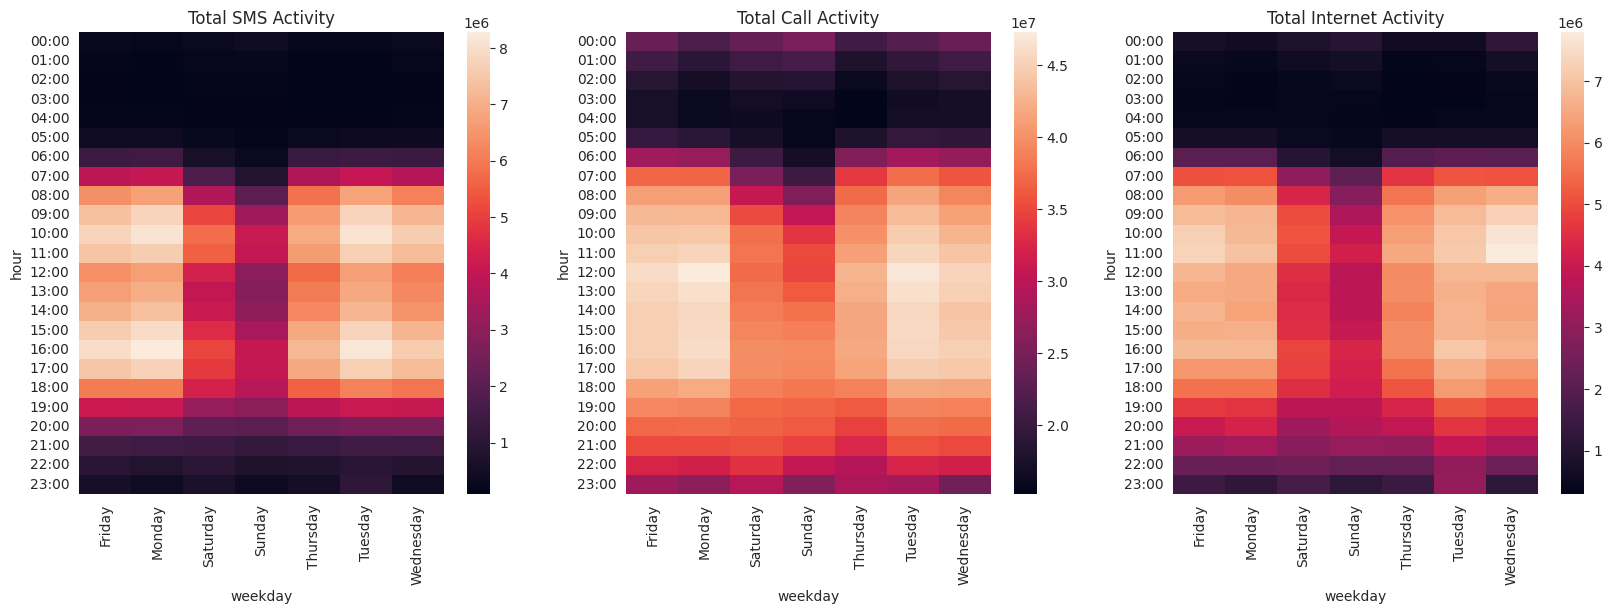

In [15]:
fig, ax = plt.subplots(1,3,figsize = (20,6))

sns.heatmap(ax = ax[0],data=weekly_hourly_act.iloc[:,:7])
sns.heatmap(ax = ax[1],data=weekly_hourly_act.iloc[:,7:14])
sns.heatmap(ax = ax[2],data=weekly_hourly_act.iloc[:,14:])

ax[0].set_title('Total SMS Activity')
ax[0].set_xticklabels(['Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday'])
ax[0].set_xlabel('weekday')

ax[1].set_title('Total Call Activity')
ax[1].set_xticklabels(['Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday'])
ax[1].set_xlabel('weekday')

ax[2].set_title('Total Internet Activity')
ax[2].set_xticklabels(['Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday'])
ax[2].set_xlabel('weekday')

plt.show()

## Observation 2: Grid ID

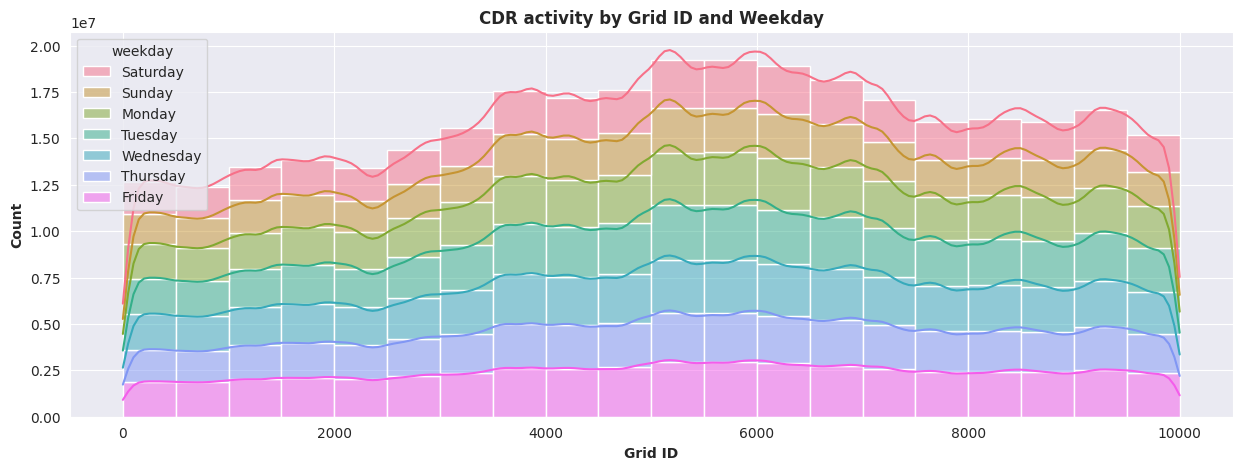

In [38]:
# CDR activity by Grid ID
plt.figure(figsize=(15,5))

cell_hist = sns.histplot(data=df,x='GridID',bins=20,hue="weekday", multiple="stack",kde=True,color='blue')

cell_hist.set_title('CDR activity by Grid ID and Weekday',fontweight='heavy')
cell_hist.set_xlabel('Grid ID',fontweight='bold')
cell_hist.set_ylabel('Count',fontweight='bold')

plt.show()

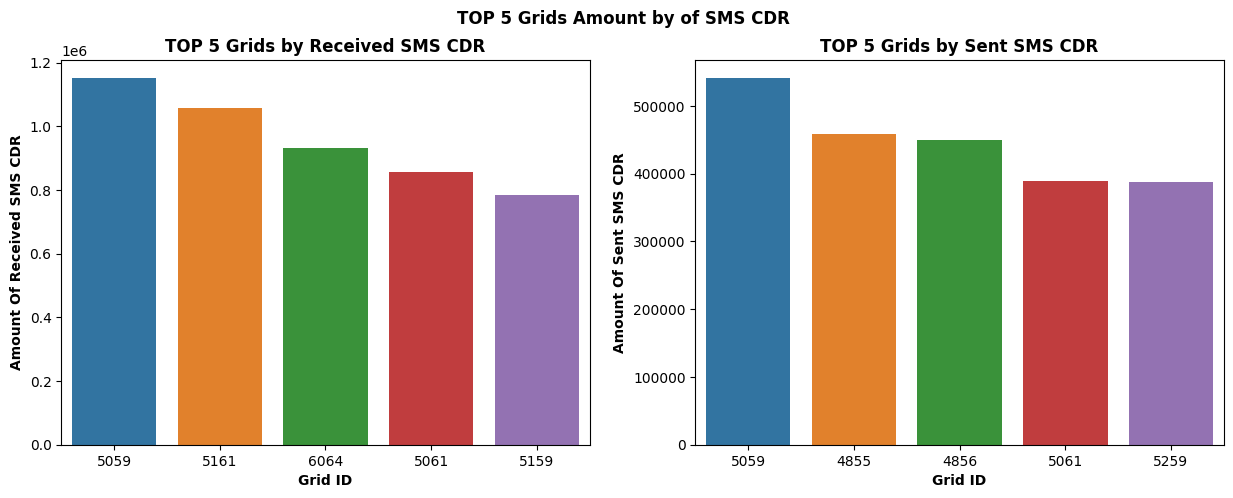

In [23]:
cell_smsin = df.groupby('GridID')['smsin'].sum().rename_axis('GridID').reset_index(name='sum_sms').sort_values('sum_sms',ascending=False).head(5)
cell_smsout = df.groupby('GridID')['smsout'].sum().rename_axis('GridID').reset_index(name='sum_sms').sort_values('sum_sms',ascending=False).head(5)

cell_smsin = cell_smsin.reset_index(drop=True)
cell_smsout = cell_smsout.reset_index(drop=True)

cell_smsin['GridID'] = cell_smsin['GridID'].astype('str')
cell_smsout['GridID'] = cell_smsout['GridID'].astype('str')

fig,ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('TOP 5 Grids Amount by of SMS CDR',fontweight='heavy')

sns.barplot(ax=ax[0],data=cell_smsin,x='GridID',y='sum_sms',hue='GridID',legend=False)
sns.barplot(ax=ax[1],data=cell_smsout,x='GridID',y='sum_sms',hue='GridID',legend=False)

ax[0].set_title('TOP 5 Grids by Received SMS CDR',fontweight='bold')
ax[0].set_xlabel('Grid ID',fontweight='bold')
ax[0].set_ylabel('Amount Of Received SMS CDR',fontweight='bold')

ax[1].set_title('TOP 5 Grids by Sent SMS CDR',fontweight='bold')
ax[1].set_xlabel('Grid ID',fontweight='bold')
ax[1].set_ylabel('Amount Of Sent SMS CDR',fontweight='bold')

plt.show()

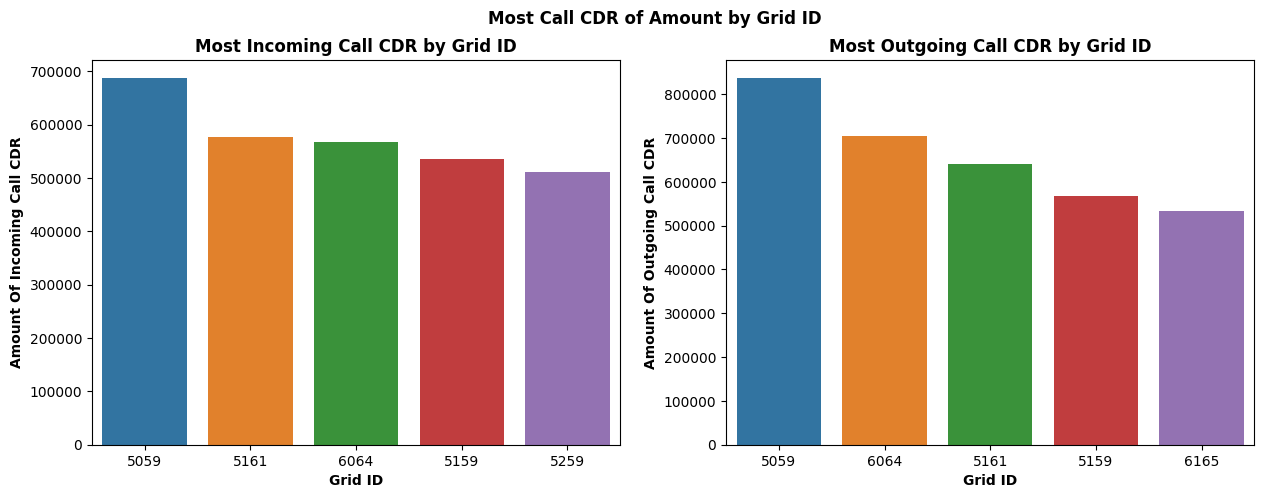

In [24]:
cell_callin = df.groupby('GridID')['callin'].sum().rename_axis('GridID').reset_index(name='sum_call').sort_values('sum_call',ascending=False).head(5)
cell_callout = df.groupby('GridID')['callout'].sum().rename_axis('GridID').reset_index(name='sum_call').sort_values('sum_call',ascending=False).head(5)

cell_callin = cell_callin.reset_index(drop=True)
cell_callout = cell_callout.reset_index(drop=True)

cell_callin['GridID'] = cell_callin['GridID'].astype('str')
cell_callout['GridID'] = cell_callout['GridID'].astype('str')

fig,ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Most Call CDR of Amount by Grid ID',fontweight='heavy')

sns.barplot(ax=ax[0],data=cell_callin,x='GridID',y='sum_call',hue='GridID',legend=False)
sns.barplot(ax=ax[1],data=cell_callout,x='GridID',y='sum_call',hue='GridID',legend=False)

plt.subplots_adjust(hspace = 0.3)

ax[0].set_title('Most Incoming Call CDR by Grid ID',fontweight='bold')
ax[0].set_xlabel('Grid ID',fontweight='bold')
ax[0].set_ylabel('Amount Of Incoming Call CDR',fontweight='bold')

ax[1].set_title('Most Outgoing Call CDR by Grid ID',fontweight='bold')
ax[1].set_xlabel('Grid ID',fontweight='bold')
ax[1].set_ylabel('Amount Of Outgoing Call CDR',fontweight='bold')

plt.show()

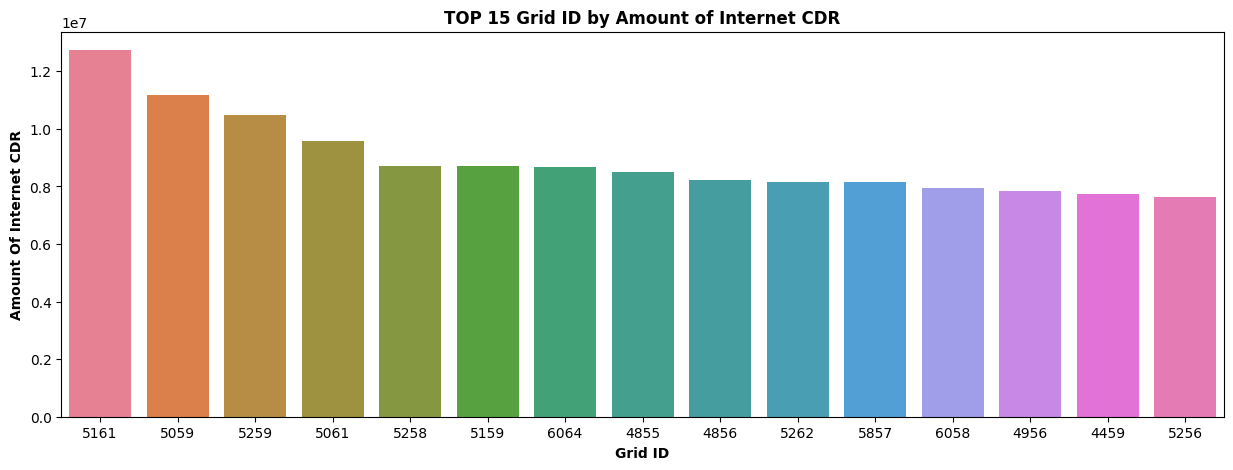

In [25]:
plt.figure(figsize=(15,5))

cell_internet = df.groupby('GridID')['internet'].sum().rename_axis('GridID').reset_index(name='internet').sort_values('internet',ascending=False).head(15)
cell_internet = cell_internet.reset_index(drop=True)
cell_internet['GridID'] = cell_internet['GridID'].astype('str')

in_bar = sns.barplot(data=cell_internet,x='GridID',y='internet',hue='GridID',legend=False)

in_bar.set_title('TOP 15 Grid ID by Amount of Internet CDR',fontweight='bold')
in_bar.set_xlabel('Grid ID',fontweight='bold')
in_bar.set_ylabel('Amount Of Internet CDR',fontweight='bold')

plt.show()

## Observation 3: Country

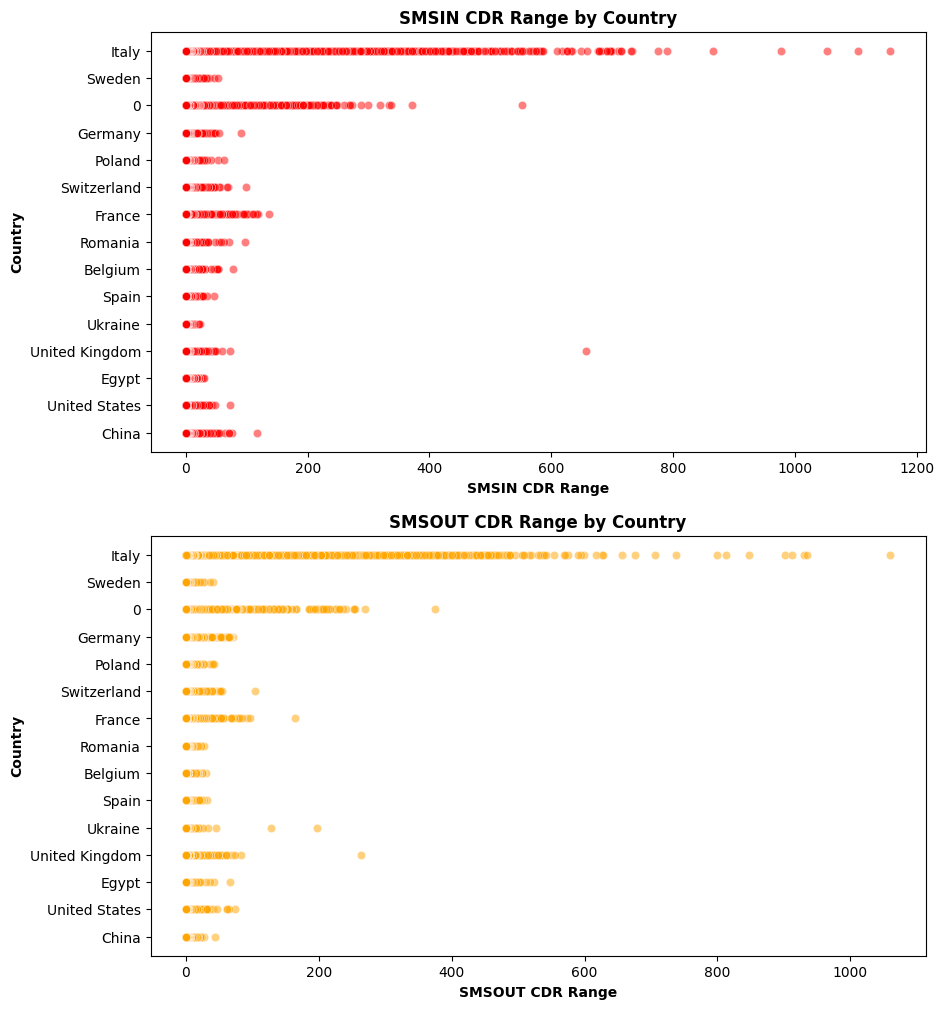

In [26]:
fig,ax = plt.subplots(2,1,figsize=(10,12))

country_df = df['country'].value_counts().reset_index().head(15)
country_df = df[df['country'].isin(country_df['country'].to_list())]

country_df.loc[:, 'country'] = country_df['country'].astype('str')

sns.scatterplot(ax=ax[0],data=country_df,y='country',x='smsin',color='red',alpha=0.5)
sns.scatterplot(ax=ax[1],data=country_df,y='country',x='smsout',color='orange',alpha=0.5)

ax[0].set_title('SMSIN CDR Range by Country',fontweight='bold')
ax[0].set_ylabel('Country',fontweight='bold')
ax[0].set_xlabel('SMSIN CDR Range',fontweight='bold')

ax[1].set_title('SMSOUT CDR Range by Country',fontweight='bold')
ax[1].set_ylabel('Country',fontweight='bold')
ax[1].set_xlabel('SMSOUT CDR Range',fontweight='bold')

plt.show()